In [276]:
require(vegan)
require(ggplot2)
require(data.table)

In [277]:
meta=read.csv("~/Documents/DE_micro/metadata/Run1_meta.csv")

In [278]:
asv=fread("~/Documents/DE_micro/ASV_tables/Run1_ASVnochim.csv")

In [279]:
taxa=fread("~/Documents/DE_micro/ASV_tables/Run1_taxa.csv", header=TRUE)

In [280]:
row.names(taxa)=asv_seqs$number

In [281]:
asv_seqs=as.data.frame(colnames(asv))
asv_seqs=as.data.frame(asv_seqs[-1,])
asv_seqs$number=paste0("asv", 1:NROW(asv_seqs))

In [282]:
colnames(asv)=c("sample", asv_seqs$number)

In [283]:
NROW(asv)

[1] 120

In [284]:
meta$total=apply(asv[,2:NCOL(asv)], 1, FUN=sum)

In [288]:
meta[order(meta$total),]

,UniqueID,Experiment,Year,Site,Treatment1.Density.,Treatment2.Diversity.,Color.Bucket,Number,Species,RFTM_score,peacrabs,total
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>
117,_____,,NA,,,,,,,NA,NA,31
120,_____,,NA,,,,,,,NA,NA,31
119,_____,,NA,,,,,,,NA,NA,48
112,2017_SW_LOW_POLY_Y13_CV,Field17,2017,SW,LOW,POLY,Y,13,CV,4.0,0,208
103,2017_SW_LOW_MONO_Y10_CV,Field17,2017,SW,LOW,MONO,Y,10,CV,2.0,0,225
31,2017_NW_LOW_MONO_R16_CV,Field17,2017,NW,LOW,MONO,R,16,CV,4.0,0,287
118,_____,,NA,,,,,,,NA,NA,850
107,2017_SW_LOW_POLY_P5_CV,Field17,2017,SW,LOW,POLY,P,5,CV,2.0,1,2298
116,2018__HIGH_MONO_HM1O73_CV,Lab18,2018,,HIGH,MONO,HM1,O73,CV,0.0,0,3069


In [201]:
##for now, remove negs.
asv=asv[1:116]
meta=meta[1:116,]

In [203]:
bc=vegdist(asv[,2:NCOL(asv)])

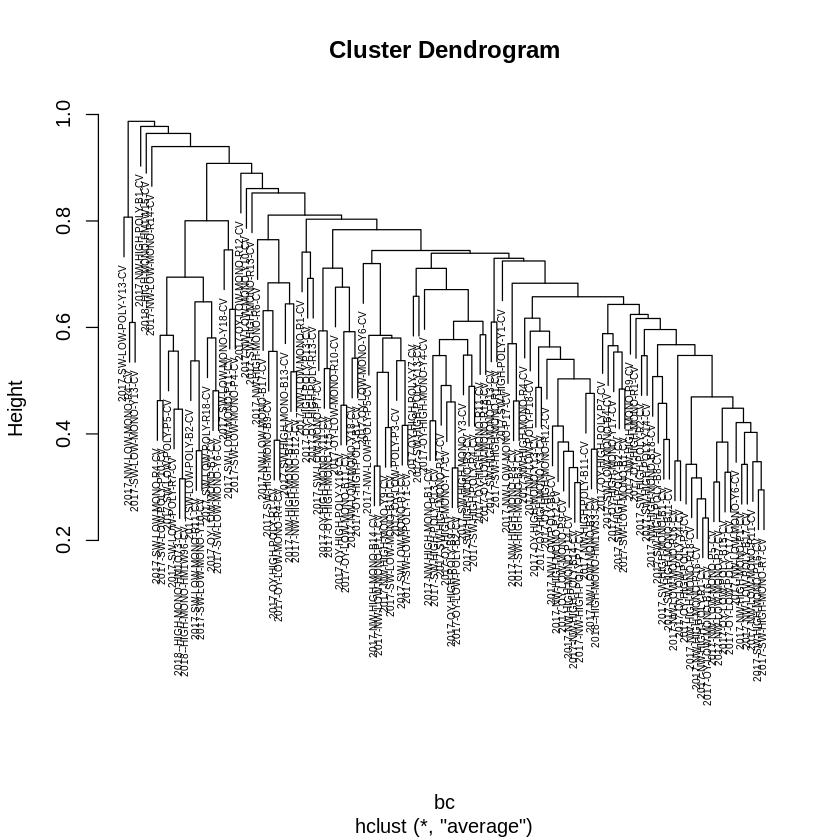

In [204]:
clust=hclust(bc, method="average")
plot(clust, labels=asv$sample, cex=0.5)

In [205]:
asv.mds= metaMDS(asv[,2:NCOL(asv)], autotransform=F, k=2, trymax=1000, distance="bray")

Run 0 stress 0.1545237 
Run 1 stress 0.1602535 
Run 2 stress 0.4132948 
Run 3 stress 0.4133713 
Run 4 stress 0.155498 
Run 5 stress 0.154267 
... New best solution
... Procrustes: rmse 0.04183177  max resid 0.3879274 
Run 6 stress 0.1616943 
Run 7 stress 0.1571591 
Run 8 stress 0.1576475 
Run 9 stress 0.1548261 
Run 10 stress 0.1521485 
... New best solution
... Procrustes: rmse 0.01616271  max resid 0.1698074 
Run 11 stress 0.1576996 
Run 12 stress 0.1628796 
Run 13 stress 0.1582721 
Run 14 stress 0.1626913 
Run 15 stress 0.1540938 
Run 16 stress 0.161079 
Run 17 stress 0.1561739 
Run 18 stress 0.1542627 
Run 19 stress 0.1568117 
Run 20 stress 0.1603217 
Run 21 stress 0.158132 
Run 22 stress 0.1633086 
Run 23 stress 0.1587307 
Run 24 stress 0.1540935 
Run 25 stress 0.1587146 
Run 26 stress 0.1562458 
Run 27 stress 0.1602457 
Run 28 stress 0.163703 
Run 29 stress 0.166831 
Run 30 stress 0.1642814 
Run 31 stress 0.152167 
... Procrustes: rmse 0.001510243  max resid 0.01565921 
Run 32 st

In [206]:
(Rsq=1-(asv.mds$stress)^2)

[1] 0.9768898

In [207]:
head(meta)

,UniqueID,Experiment,Year,Site,Treatment1.Density.,Treatment2.Diversity.,Color.Bucket,Number,Species,RFTM_score,peacrabs
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
1,2017_NW_HIGH_MONO_B1_CV,Field17,2017,NW,HIGH,MONO,B,1,CV,1,0
2,2017_NW_HIGH_MONO_B11_CV,Field17,2017,NW,HIGH,MONO,B,11,CV,2,0
3,2017_NW_HIGH_MONO_B12_CV,Field17,2017,NW,HIGH,MONO,B,12,CV,0,0
4,2017_NW_HIGH_MONO_B14_CV,Field17,2017,NW,HIGH,MONO,B,14,CV,1,0
5,2017_NW_HIGH_MONO_B18_CV,Field17,2017,NW,HIGH,MONO,B,18,CV,4,0
6,2017_NW_HIGH_MONO_P1_CV,Field17,2017,NW,HIGH,MONO,P,1,CV,1,0


In [209]:
names.factors=colnames(meta)[2:11]

In [208]:
nmds.coords <- cbind(asv.mds$points, meta[, 2:11])
species.scores=asv.mds$species

In [210]:
# Fit explanatory factors onto ordination space
env=as.data.frame(meta[, 2:11])

In [211]:
ef=envfit(asv.mds, env)

In [229]:
colsite <- c("magenta", "darkred", "darkblue", "darkorange")

In [230]:
pchDiversity <- c(1,15, 19)

In [215]:
colnames(meta)=c("Sample", "Experiment", "Year", "Site", "Density", "Diversity", "ColorBucket", "Number", "Species", "RFTM", "peacrab")

NULL

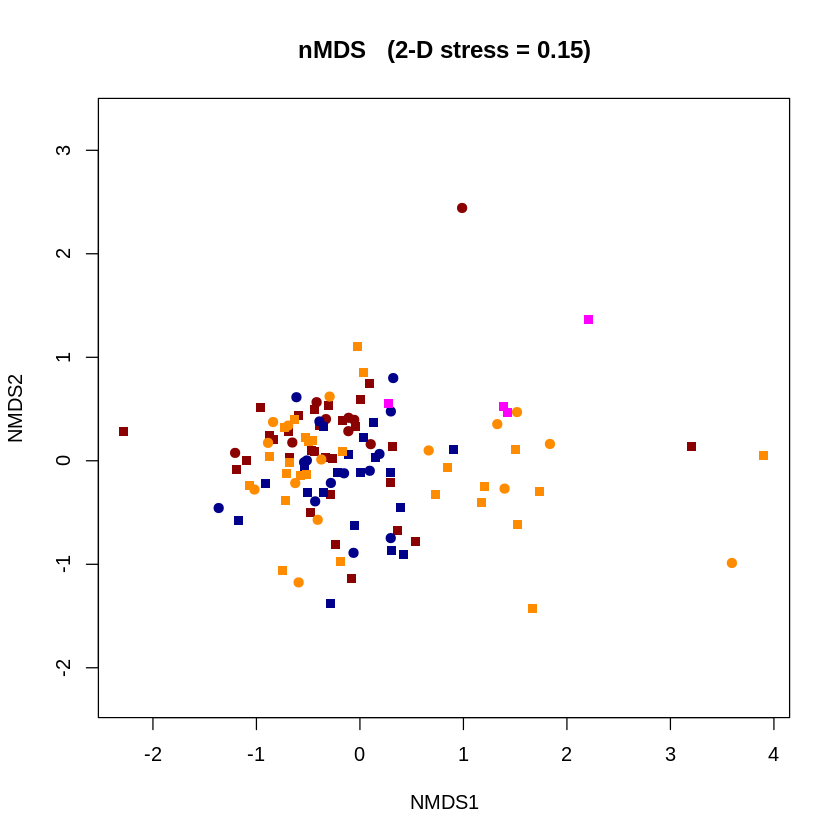

In [232]:
plot(asv.mds, "sites", main=paste("nMDS   (2-D stress = ", 
                 round(asv.mds$stress, digit=2), ")", sep=""))
with(meta,
     points(asv.mds,
            display = "sites",
            #col = "black",
            pch = pchDiversity[Diversity],
            col = colsite[Site]))

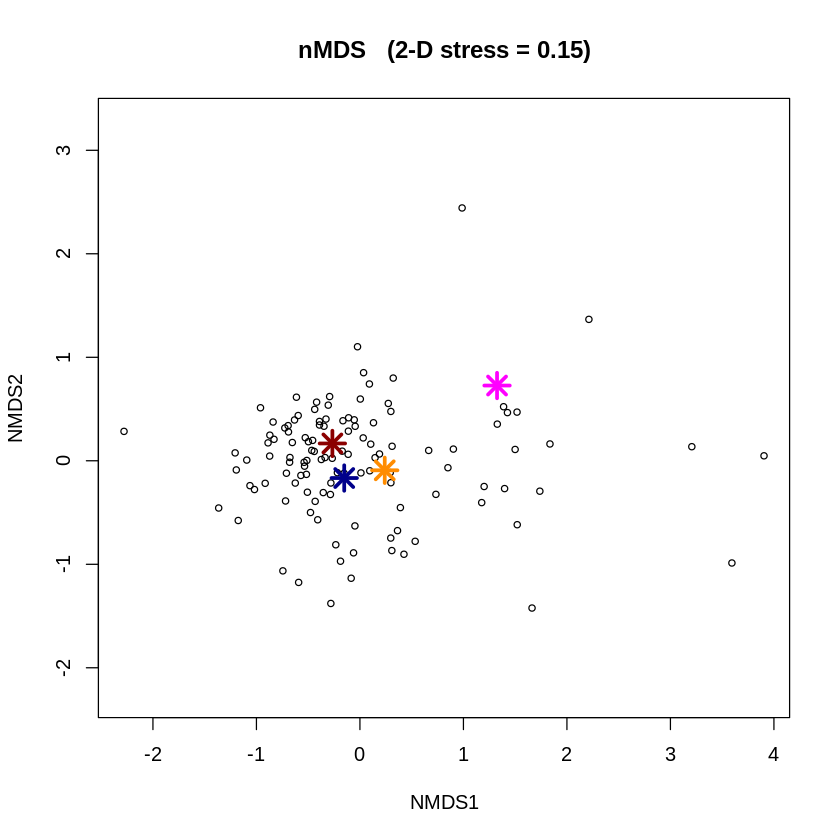

In [233]:
plot(asv.mds, "sites", main=paste("nMDS   (2-D stress = ", 
                 round(asv.mds$stress, digit=2), ")", sep=""))
scrs <-
  scores(asv.mds, display = "sites", "species")
cent <-
  aggregate(scrs ~ Site, data = meta, FUN = "mean")
names(cent) [-1] <- colnames(scrs)
points(cent [,-1],
       pch = c( 8 , 8 , 8, 8),
       col = c("magenta", "darkred", "darkblue", "darkorange"),
       bg = c("black"),
       lwd = 3.0,
       cex = 2.0 # Plots centroids as points on ordination
       )

In [242]:
colrftm <- c("grey80", "grey60", "grey40", "grey20", "grey0")


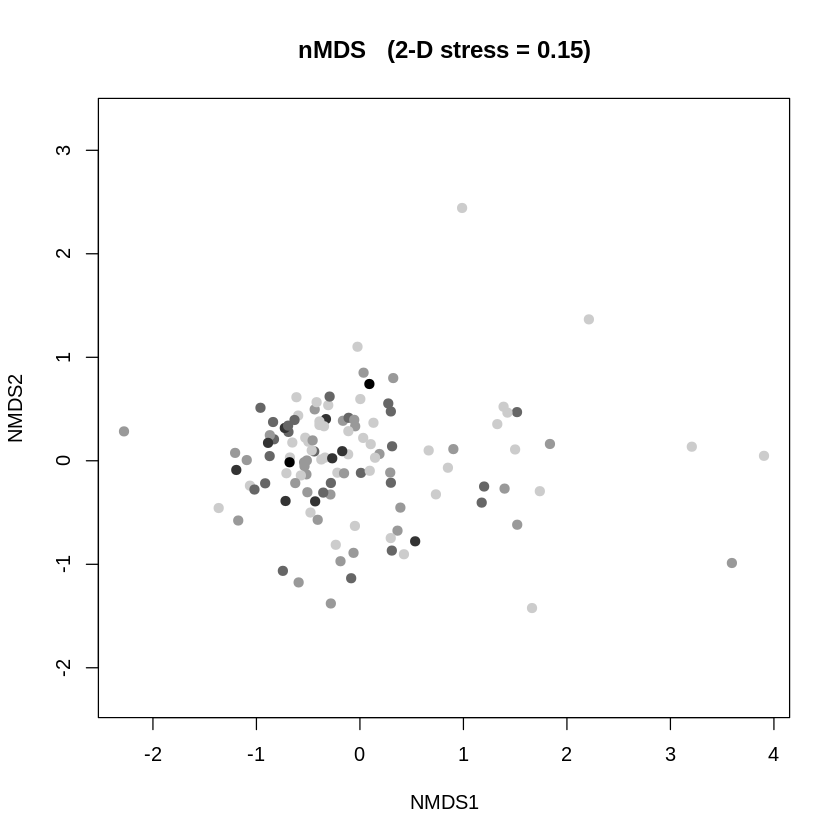

In [243]:
plot(asv.mds, "sites", main=paste("nMDS   (2-D stress = ", 
                 round(asv.mds$stress, digit=2), ")", sep=""))
with(meta,
     points(asv.mds,
            display = "sites",
            #col = "black",
            pch = 19,
            col = colrftm[RFTM]))

Can look at growth, both total growth for the first experiment, and the second actual growth. 